# Exploring the Universe of Discourse Partitioners

## Environment Setup

### Library install/update

In [ ]:
!pip3 install -U git+https://github.com/petroniocandido/pyFTS

### External libraries import

In [1]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


### Common pyFTS imports 

In [2]:
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.data import Enrollments

### Common data transformations

In [3]:
from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

## Dataset

### Data Loading

In [4]:
from pyFTS.data import TAIEX

dataset = TAIEX.get_data()
dataset_diff = tdiff.apply(dataset)

### Visualization

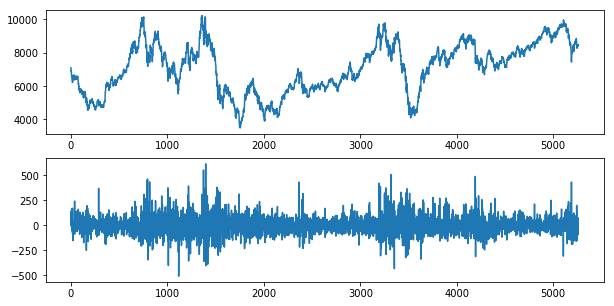

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10,5])
ax[0].plot(dataset)
ax[1].plot(dataset_diff)

## Exploring partitioning schemes

### Same mathod with different membership functions

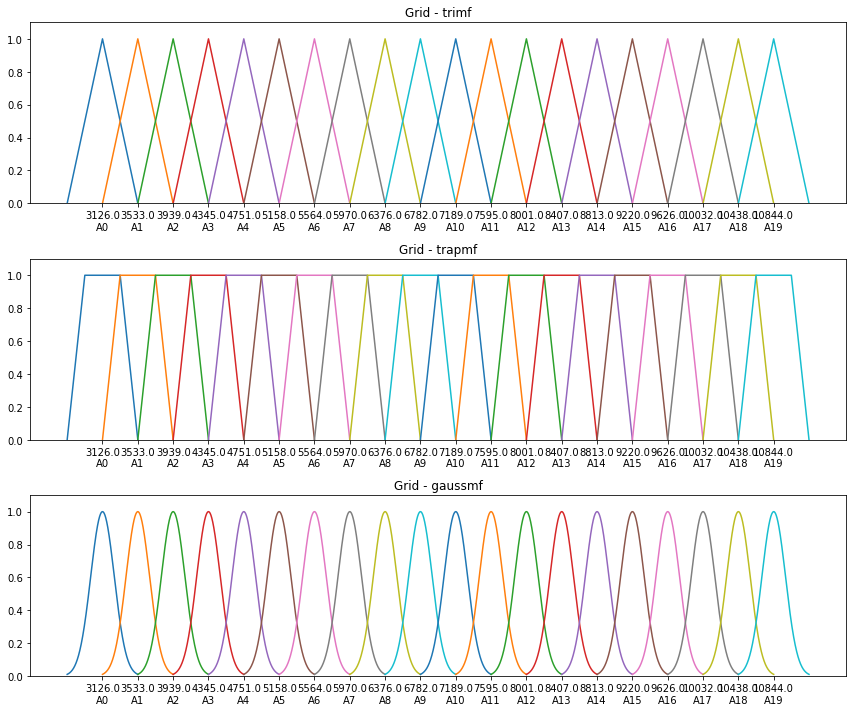

In [10]:
part = pUtil.explore_partitioners(dataset, 20, methods=[Grid.GridPartitioner], 
                                  mf=[mf.trimf, mf.trapmf, mf.gaussmf])

In [11]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([2720.220125, 3126.4335, 3532.6468750000004])
A1: trimf([3126.4335, 3532.6468750000004, 3938.8602500000006])
A2: trimf([3532.6468750000004, 3938.8602500000006, 4345.073625000001])
A3: trimf([3938.8602500000006, 4345.073625000001, 4751.287000000001])
A4: trimf([4345.073625000001, 4751.287000000001, 5157.500375000001])
A5: trimf([4751.287000000001, 5157.500375000001, 5563.713750000002])
A6: trimf([5157.500375000001, 5563.713750000002, 5969.927125000002])
A7: trimf([5563.713750000002, 5969.927125000002, 6376.140500000002])
A8: trimf([5969.927125000002, 6376.140500000002, 6782.3538750000025])
A9: trimf([6376.140500000002, 6782.3538750000025, 7188.567250000003])
A10: trimf([6782.3538750000025, 7188.567250000003, 7594.780625000003])
A11: trimf([7188.567250000003, 7594.780625000003, 8000.994000000003])
A12: trimf([7594.780625000003, 8000.994000000003, 8407.207375000004])
A13: trimf([8000.994000000003, 8407.207375000004, 8813.420750000003])
A14: trimf([8407.207375000005

### Same mathod with different membership functions and transformation

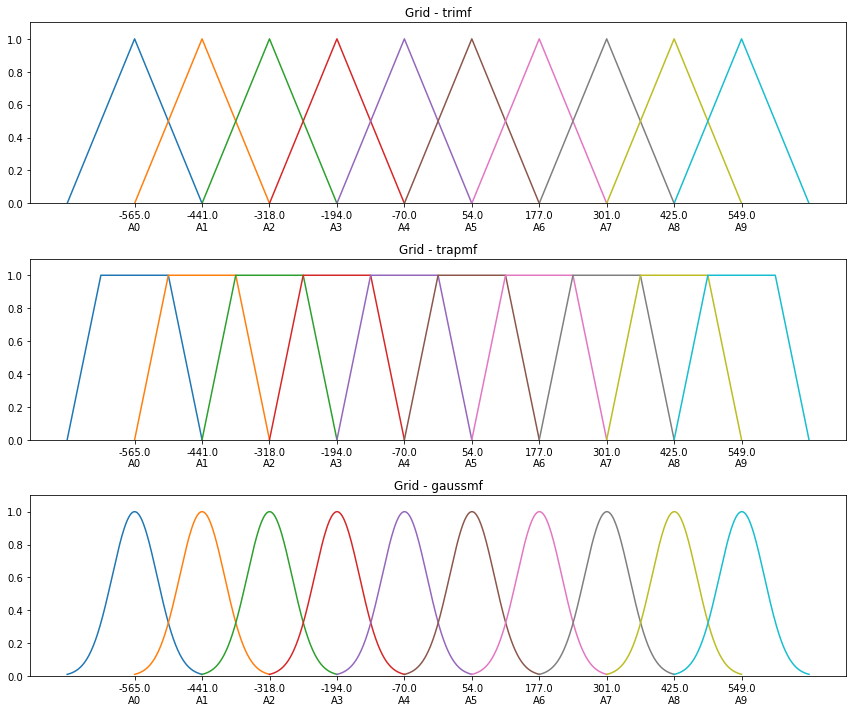

In [12]:
part = pUtil.explore_partitioners(dataset, 10, methods=[Grid.GridPartitioner], 
                                  mf=[mf.trimf, mf.trapmf, mf.gaussmf], transformation=tdiff)

In [13]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([-688.963, -565.213, -441.46299999999997])
A1: trimf([-565.213, -441.46299999999997, -317.71299999999997])
A2: trimf([-441.46299999999997, -317.71299999999997, -193.96299999999997])
A3: trimf([-317.71299999999997, -193.96299999999997, -70.21299999999997])
A4: trimf([-193.96299999999997, -70.21299999999997, 53.537000000000035])
A5: trimf([-70.21299999999997, 53.537000000000035, 177.28700000000003])
A6: trimf([53.537000000000035, 177.28700000000003, 301.03700000000003])
A7: trimf([177.28700000000003, 301.03700000000003, 424.78700000000003])
A8: trimf([301.03700000000003, 424.78700000000003, 548.537])
A9: trimf([424.78700000000003, 548.537, 672.287])

Grid - trapmf:
A0: trapmf([-688.963, -627.088, -503.33799999999997, -441.46299999999997])
A1: trapmf([-565.213, -503.33799999999997, -379.58799999999997, -317.71299999999997])
A2: trapmf([-441.46299999999997, -379.58799999999997, -255.83799999999997, -193.96299999999997])
A3: trapmf([-317.71299999999997, -255.83799999

### Several different mathods

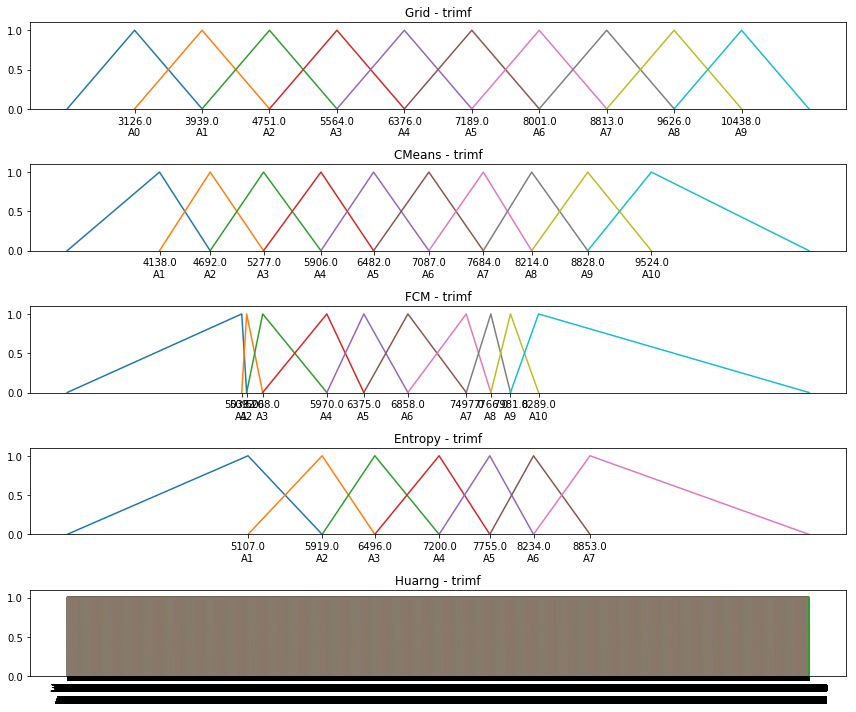

In [6]:
part = pUtil.explore_partitioners(dataset, 10, methods=[Grid.GridPartitioner, CMeans.CMeansPartitioner, 
                                                           FCM.FCMPartitioner, Entropy.EntropyPartitioner,
                                                           Huarng.HuarngPartitioner], 
                                  mf=[mf.trimf])

In [5]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([10797.38, 11749.5, 12701.62])
A1: trimf([11749.5, 12701.62, 13653.740000000002])
A2: trimf([12701.62, 13653.740000000002, 14605.860000000002])
A3: trimf([13653.740000000002, 14605.860000000002, 15557.980000000003])
A4: trimf([14605.860000000002, 15557.980000000003, 16510.100000000002])
A5: trimf([15557.980000000005, 16510.100000000006, 17462.220000000005])
A6: trimf([16510.100000000006, 17462.220000000005, 18414.340000000004])
A7: trimf([17462.220000000005, 18414.340000000004, 19366.460000000003])
A8: trimf([18414.340000000007, 19366.460000000006, 20318.580000000005])
A9: trimf([19366.46000000001, 20318.58000000001, 21270.700000000008])

CMeans - trimf:
A1: trimf([11749.5, 13495.0, 14696.0])
A2: trimf([13495.0, 14696.0, 15154.0])
A3: trimf([14696.0, 15154.0, 15460.8])
A4: trimf([15154.0, 15460.8, 15922.5])
A5: trimf([15460.8, 15922.5, 16743.25])
A6: trimf([15922.5, 16743.25, 18150.0])
A7: trimf([16743.25, 18150.0, 18923.0])
A8: trimf([18150.0, 18923.0, 19328.0]

### Several different mathods with transformation

In [ ]:
part = pUtil.explore_partitioners(dataset, 10, methods=[Grid.GridPartitioner, CMeans.CMeansPartitioner, 
                                                           FCM.FCMPartitioner, Entropy.EntropyPartitioner,
                                                           Huarng.HuarngPartitioner], 
                                  mf=[mf.trimf], transformation=tdiff)